# Tabular models

In [1]:
from fastai import *
from fastai.tabular import *
from tqdm import tqdm_notebook as tqdm

Tabular data should be in a Pandas `DataFrame`.

In [2]:
path = Path('../Data/Cat-in-the-dat/') #untar_data(URLs.ADULT_SAMPLE)
df = pd.read_csv(path/'train.csv')
df.set_index('id',drop=True,inplace=True)
test_df = pd.read_csv(path/'test.csv')
test_df.set_index('id',drop=True,inplace=True)
sample = pd.read_csv(path/'sample_submission.csv')

In [3]:
path

PosixPath('../Data/Cat-in-the-dat')

In [4]:
df.tail()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
id,,,,,,,,,,,,,,,,,,,,,
599995,0.0,1.0,0.0,T,N,Red,Polygon,Axolotl,India,Theremin,...,015c63324,3.0,Novice,Freezing,a,R,GZ,5.0,NaN,0
599996,1.0,0.0,0.0,T,Y,Blue,Polygon,Dog,Costa Rica,Oboe,...,a02ae6a63,2.0,Novice,Boiling Hot,n,N,sf,NaN,3.0,0
599997,0.0,0.0,0.0,F,Y,Red,Circle,Axolotl,Russia,Theremin,...,40f9610c1,2.0,Contributor,Freezing,n,H,MV,7.0,5.0,0
599998,1.0,1.0,0.0,F,Y,NaN,Polygon,Axolotl,NaN,Piano,...,c1a8374a0,1.0,Master,Warm,m,X,Ey,1.0,5.0,0
599999,0.0,0.0,0.0,T,N,Blue,Triangle,Dog,Russia,Theremin,...,e2aea7784,1.0,Contributor,Boiling Hot,b,O,uI,5.0,8.0,0


In [5]:
test_df.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
id,,,,,,,,,,,,,,,,,,,,,
600000,0.0,0.0,0.0,F,Y,Blue,Polygon,Axolotl,Finland,Piano,...,ca9ad1d4b,fced9e114,3.0,Novice,Boiling Hot,f,U,oU,3.0,9.0
600001,0.0,0.0,0.0,F,Y,Red,Circle,Lion,Russia,Bassoon,...,060a21580,7ca8775da,1.0,Novice,Cold,n,N,NaN,2.0,8.0
600002,0.0,0.0,0.0,F,Y,Blue,Circle,Axolotl,Russia,Theremin,...,165e81a00,5940334c9,1.0,Expert,Warm,i,N,DN,2.0,6.0
600003,1.0,0.0,0.0,F,N,Red,Polygon,Axolotl,Costa Rica,Bassoon,...,77d41330d,6fbdeefc8,1.0,Expert,Hot,m,B,AG,1.0,6.0
600004,0.0,0.0,1.0,F,Y,Red,Circle,NaN,Finland,Theremin,...,2218d9dfe,2a27c8fde,1.0,Contributor,Lava Hot,o,J,DT,3.0,3.0


## Do some EDA

In [6]:
# df.id.nunique()

In [7]:
df.bin_0.nunique(), df.bin_1.nunique(), df.bin_2.nunique(), df.bin_3.nunique(), df.bin_4.nunique()

(2, 2, 2, 2, 2)

In [8]:
df.nom_0.nunique(), df.nom_1.nunique(), df.nom_2.nunique(), df.nom_3.nunique(), df.nom_4.nunique(), df.nom_5.nunique(), df.nom_6.nunique(), df.nom_7.nunique(), df.nom_8.nunique(), df.nom_9.nunique(), 

(3, 6, 6, 6, 4, 1220, 1519, 222, 222, 2218)

In [9]:
df.ord_0.nunique(), df.ord_1.nunique(), df.ord_2.nunique(), df.ord_3.nunique(), df.ord_4.nunique(), df.ord_5.nunique() 

(3, 5, 6, 15, 26, 190)

In [10]:
df.day.nunique(), df.month.nunique()

(7, 12)

In [11]:
df.columns

Index(['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4', 'nom_0', 'nom_1', 'nom_2',
       'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9', 'ord_0',
       'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5', 'day', 'month', 'target'],
      dtype='object')

In [12]:
dep_var = 'target'
cat_names = ['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4', 'nom_0', 'nom_1',
             'nom_2', 'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8',
             'nom_9','ord_0', 'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5',
             'day', 'month']
# cont_names = ['id']
procs = [FillMissing, Categorify, Normalize]

In [13]:
df.bin_0.dtype

dtype('float64')

In [14]:
embed = {}
# for col in cat_names:
# #     print(col)
#     if df[col].nunique() < 50:
#         embed[col] = 50

# a max of 50
for col in cat_names:
    embed[col] = min(50, df[col].nunique()) 

In [15]:
embed

{'bin_0': 2,
 'bin_1': 2,
 'bin_2': 2,
 'bin_3': 2,
 'bin_4': 2,
 'nom_0': 3,
 'nom_1': 6,
 'nom_2': 6,
 'nom_3': 6,
 'nom_4': 4,
 'nom_5': 50,
 'nom_6': 50,
 'nom_7': 50,
 'nom_8': 50,
 'nom_9': 50,
 'ord_0': 3,
 'ord_1': 5,
 'ord_2': 6,
 'ord_3': 15,
 'ord_4': 26,
 'ord_5': 50,
 'day': 7,
 'month': 12}

In [16]:
len(cat_names)

23

In [18]:
valid_idx=np.random.random_integers(0,600000,10000)
valid_idx

/home/anubhav/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: This function is deprecated. Please call randint(0, 600000 + 1) instead
  """Entry point for launching an IPython kernel.


array([ 22437, 483301,  62941, 510029, ..., 292497, 251714, 540901, 296723])

In [19]:
len(valid_idx)

10000

In [20]:
# test = TabularList.from_df(test_df, path=path, cat_names=cat_names, cont_names=cont_names)#, procs=procs)

test = TabularList.from_df(test_df, path=path, cat_names=cat_names)#, cont_names=cont_names)

In [21]:
# data = (TabularList.from_df(df, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
#                            .split_by_idx(list(range(590000,599999)))
#                            .label_from_df(cols=dep_var)
#                            .add_test(test)
#                            .databunch(bs=1024))

data = (TabularList.from_df(df, path=path, cat_names=cat_names, procs=procs)
                           .split_by_idx(valid_idx)
                           .label_from_df(cols=dep_var)
                           .add_test(test)
                           .databunch(bs=1024))

In [22]:
data.show_batch(rows=5)

bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0.0,#na#,0.0,T,Y,Red,Trapezoid,#na#,Finland,Bassoon,820abde38,d07c64f10,7f31f4d2b,9417fa5d7,bad8b057c,1.0,Novice,Hot,d,B,mo,5.0,1.0,0
0.0,0.0,0.0,F,N,Blue,Star,Axolotl,Costa Rica,Theremin,6f6006d40,ae6737c29,7684d9eb7,d8e02864a,114fa41d7,#na#,Contributor,Warm,b,B,us,5.0,3.0,0
0.0,0.0,1.0,F,Y,Red,Trapezoid,Hamster,China,Theremin,bc5c1cb2d,587c08adf,b97010abc,abce980f5,ab3e54de6,#na#,Contributor,Warm,a,Y,qP,1.0,3.0,0
0.0,0.0,0.0,T,N,Red,Polygon,Cat,India,Theremin,b2d1ecfad,0137900c0,7f6fad56e,862d2fbff,b29c5465a,1.0,Contributor,Warm,f,P,us,7.0,5.0,1
0.0,#na#,0.0,F,N,Blue,Polygon,Dog,India,Bassoon,543356e6e,93af5c0ab,3c415c2b7,60c7c84ee,c03863daf,3.0,Grandmaster,Freezing,a,C,kT,1.0,5.0,0


In [25]:


weights = [0.3, 0.7]
class_weights=torch.FloatTensor(weights)
class_weights

tensor([0.3000, 0.7000])

In [33]:
# learn = tabular_learner(data, layers=[300,200,100], metrics=accuracy)

# learn = tabular_learner(data, layers=[300, 300],emb_szs=embed, emb_drop=0.04,
#                         ps=[0.001, 0.01], metrics=accuracy)

# Deafult Embedding Sizes

learn = tabular_learner(data, layers=[300, 300], emb_drop=0.04, ps=[0.001, 0.01], metrics=AUROC())
learn.loss_func = nn.CrossEntropyLoss(class_weights)

In [34]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(3, 3)
    (1): Embedding(3, 3)
    (2): Embedding(3, 3)
    (3): Embedding(3, 3)
    (4): Embedding(3, 3)
    (5): Embedding(4, 3)
    (6): Embedding(7, 5)
    (7): Embedding(7, 5)
    (8): Embedding(7, 5)
    (9): Embedding(5, 4)
    (10): Embedding(1221, 86)
    (11): Embedding(1520, 97)
    (12): Embedding(223, 33)
    (13): Embedding(223, 33)
    (14): Embedding(2219, 120)
    (15): Embedding(4, 3)
    (16): Embedding(6, 4)
    (17): Embedding(7, 5)
    (18): Embedding(16, 8)
    (19): Embedding(27, 10)
    (20): Embedding(191, 30)
    (21): Embedding(8, 5)
    (22): Embedding(13, 7)
  )
  (emb_drop): Dropout(p=0.04)
  (bn_cont): BatchNorm1d(0, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=478, out_features=300, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.00

In [35]:
learn.loss_func

CrossEntropyLoss()

In [36]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.32E-02
Min loss divided by 10: 6.92E-03


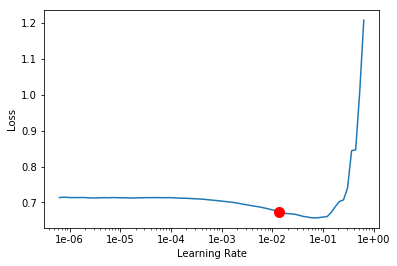

In [37]:
learn.recorder.plot(suggestion=True)

In [38]:
data.batch_size

1024

In [46]:
learn.fit(2, 3e-4, wd = 0.1)

epoch,train_loss,valid_loss,auroc,time
0,0.513853,0.523482,0.785480,01:02
1,0.504233,0.528045,0.781564,01:02


In [47]:
learn.save('66auroc')

In [48]:
learn.export('66leaderboard.pkl')

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(5, 3e-04)

In [ ]:
learn.recorder.plot_losses()

## Inference

In [ ]:
learn.load('1')

In [ ]:
sample.head()

In [ ]:
row = df.iloc[0]

In [ ]:
DatasetType.Test

In [49]:
pred = learn.get_preds(DatasetType.Test)

In [50]:
pred[0]

tensor([[0.7779, 0.2221],
        [0.5891, 0.4109],
        [0.7023, 0.2977],
        ...,
        [0.2280, 0.7720],
        [0.4996, 0.5004],
        [0.6706, 0.3294]])

In [51]:
def get_submision(preds):
    labelled_preds = []
    pred11 = preds
    for pred in tqdm(pred11):
        labelled_preds.append(int(np.argmax(pred)))
    
    sample['target'] = labelled_preds
    
    return sample

In [52]:
submission = get_submision(pred[0])

In [53]:
submission.head()

,id,target
0,600000,0
1,600001,0
2,600002,0
3,600003,0
4,600004,0


In [54]:
# submission.reset_index(drop=True)

In [55]:
submission.to_csv('./Cat_Crent_w_66beyond.csv',index=False)

## Interpretation

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()